# AI Fake News Detector

####Azaan Fatta, Stone Harward, Juan Ramirez Castrejon, Connor Delk, Dominique Penney

This project aims to build a machine learning model that can classify news headlines as **Fake** or **Real** using natural language processing (NLP). We use the widely known Fake/True News dataset from Kaggle, consisting of two CSV files: `Fake.csv` and `True.csv`.


In [29]:
import pandas as pd
import numpy as np

In [30]:

fake_url = "https://drive.google.com/uc?id=1sQV8Tp5zwnOfdQzEEDh0BsEmn3gGSBVH"
true_url ="https://drive.google.com/uc?id=1Gm_bDcNVSRICLuptLHJfEuNqQoGgKHWW"


In [31]:
# Load the uploaded CSV files into DataFrames
fake = pd.read_csv(fake_url)
true = pd.read_csv(true_url)

print("Fake shape:", fake.shape)
print("True shape:", true.shape)

fake.head(), true.head()


Fake shape: (23481, 4)
True shape: (21417, 4)


(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [32]:
# Add label: 1 = fake, 0 = real
fake["label"] = 1
true["label"] = 0

fake[["title", "label"]].head(), true[["title", "label"]].head()


(                                               title  label
 0   Donald Trump Sends Out Embarrassing New Year’...      1
 1   Drunk Bragging Trump Staffer Started Russian ...      1
 2   Sheriff David Clarke Becomes An Internet Joke...      1
 3   Trump Is So Obsessed He Even Has Obama’s Name...      1
 4   Pope Francis Just Called Out Donald Trump Dur...      1,
                                                title  label
 0  As U.S. budget fight looms, Republicans flip t...      0
 1  U.S. military to accept transgender recruits o...      0
 2  Senior U.S. Republican senator: 'Let Mr. Muell...      0
 3  FBI Russia probe helped by Australian diplomat...      0
 4  Trump wants Postal Service to charge 'much mor...      0)

In [33]:
# Combine fake and real into one DataFrame
df = pd.concat([fake, true], ignore_index=True)

print("Combined shape:", df.shape)
df.head()


Combined shape: (44898, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [34]:
# Focus on title (headline) + label only
df = df[["title", "label"]]

df.head()


,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


## Next Steps

- Handle any missing values if needed
- Shuffle the dataset
- Show:
  - Class distribution (fake vs real)
  - A few sample fake and real headlines
- Then move on to train/test split and TF-IDF.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# --- BRIDGING THE GAP (Preprocessing) ---

# 1. Shuffle the dataset (Currently it's all Fake then all True, which is bad for training)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 2. Define Features (X) and Target (y)
# We are using the 'title' column as the feature based on the V1 notebook structure
X = df['title']
y = df['label']

# 3. Split into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Vectorization (TF-IDF)
# Convert text to numbers so the Logistic Regression can understand it
print("Vectorizing data... this may take a moment.")
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("Data processed. Ready for Model Training.")

Vectorizing data... this may take a moment.
Data processed. Ready for Model Training.


In [36]:
# --- Connor's Section: Train/Test Split + TF-IDF Vectorization ---

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Make sure we are only using the columns we care about:
#    - 'title'  -> headline text (feature)
#    - 'label'  -> 0 = real, 1 = fake (target)
df_model = df[["title", "label"]].dropna()

print("Data shape after selecting columns and dropping NaNs:", df_model.shape)

# 2.Shuffle the dataset
df_model = df_model.sample(frac=1, random_state=42).reset_index(drop=True)

# 3. Define Features (X) and Target (y)
X = df_model["title"]   # headlines
y = df_model["label"]   # 0 = real, 1 = fake

# 4. Train/Test Split
#    Use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y    # keeps class balance similar in train and test
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# 5. TF-IDF Vectorization
#    Convert the raw text into numeric vectors that the model can use.
#    - stop_words='english' removes common English words (e.g., "the", "and")
#    - max_df=0.7 ignores extremely common terms that appear in >70% of documents
print("\nFitting TF-IDF vectorizer on training data...")
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("X_train_vectorized shape:", X_train_vectorized.shape)
print("X_test_vectorized shape:", X_test_vectorized.shape)
print("\nTF-IDF vectorization complete. Data is ready for model training.")


Data shape after selecting columns and dropping NaNs: (44898, 2)
Training samples: 35918
Testing samples: 8980

Fitting TF-IDF vectorizer on training data...
X_train_vectorized shape: (35918, 19285)
X_test_vectorized shape: (8980, 19285)

TF-IDF vectorization complete. Data is ready for model training.


In [37]:
# --- DOMINIQUE'S SECTION (Model Training & Evaluation) ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the Logistic Regression Model
log_reg = LogisticRegression()

# 2. Train the model
print("Training Logistic Regression Model...")
log_reg.fit(X_train_vectorized, y_train)

# 3. Make Predictions
pred_log_reg = log_reg.predict(X_test_vectorized)

# 4. Classification Report
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, pred_log_reg))

Training Logistic Regression Model...

--- Logistic Regression Results ---
Accuracy: 0.9476614699331849

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4284
           1       0.96      0.94      0.95      4696

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



--- DOMINIQUE'S DATA CLEANING ---
Duplicates before cleaning: 6169
Duplicates removed. Final dataset size: (38729, 2)


/tmp/ipython-input-2665491341.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


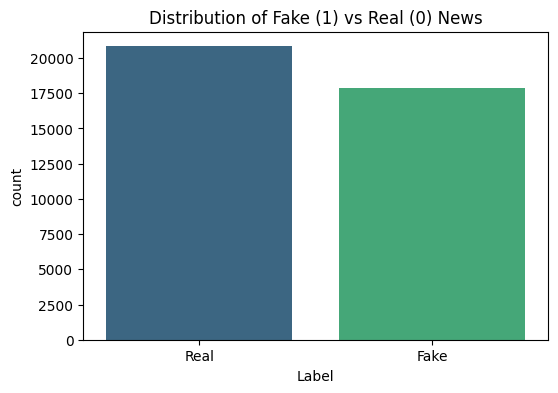


--- SAMPLE REAL HEADLINES ---
['Deadly Somalia blast reveals flaws in intelligence efforts'
 'Ex-ally of Malaysian PM Najib held in graft probe: source'
 'Venezuela president brings Cuba donation in wake of hurricane']

--- SAMPLE FAKE HEADLINES ---
[' Shonda Rhimes Gives Donald Trump A HILARIOUS Education In ‘Late Term Abortion’ (TWEET)'
 'OOPS! LIST OF TOP 10 CORPORATE TAX DODGERS Are All Hillary Donors…Compliments Of Bernie Sanders'
 ' REPORT: Jared Kushner ‘F**king Furious’ Over Bannon Activity In White House (DETAILS)']


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ======================================================
#  PART 1: DOMINIQUE'S SECTION (Data Cleaning & EDA)
# ======================================================

# 1. Clean Data
# Removing duplicates is critical so the model doesn't memorize repeated headlines
print("--- DOMINIQUE'S DATA CLEANING ---")
print(f"Duplicates before cleaning: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates removed. Final dataset size: {df.shape}")

# 2. Visualization (Distribution Chart)
# This proves to the group that our dataset is balanced
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Fake (1) vs Real (0) News')
plt.xlabel('Label')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

# 3. Sample Headlines
# Showing the raw text to verify what we are working with
print("\n--- SAMPLE REAL HEADLINES ---")
print(df[df['label'] == 0]['title'].sample(3).values)

print("\n--- SAMPLE FAKE HEADLINES ---")
print(df[df['label'] == 1]['title'].sample(3).values)

In [39]:
# ======================================================
#  PART 2: THE BRIDGE (Preprocessing)
#  (Required to turn Text into Numbers for Juan's Model)
# ======================================================

print("\n--- PREPROCESSING (THE BRIDGE) ---")

# 1. Define Features (X) and Target (y)
X = df['title']
y = df['label']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Vectorize (TF-IDF)
# Converting English words into Math vectors
print("Vectorizing data... please wait.")
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
print("Data vectorized and ready for training.")


--- PREPROCESSING (THE BRIDGE) ---
Vectorizing data... please wait.
Data vectorized and ready for training.


In [40]:
# ======================================================
#  PART 3: JUAN'S SECTION (Logistic Regression Model)
# ======================================================

print("\n--- JUAN'S MODEL TRAINING ---")

# 1. Initialize and Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_vectorized, y_train)
print("Model trained successfully.")

# 2. Make Predictions
pred_log_reg = log_reg.predict(X_test_vectorized)

# 3. Evaluation Report
print("\n--- LOGISTIC REGRESSION RESULTS ---")
print(f"Accuracy Score: {accuracy_score(y_test, pred_log_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, pred_log_reg))


--- JUAN'S MODEL TRAINING ---
Model trained successfully.

--- LOGISTIC REGRESSION RESULTS ---
Accuracy Score: 0.9378

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4170
           1       0.95      0.92      0.93      3576

    accuracy                           0.94      7746
   macro avg       0.94      0.94      0.94      7746
weighted avg       0.94      0.94      0.94      7746



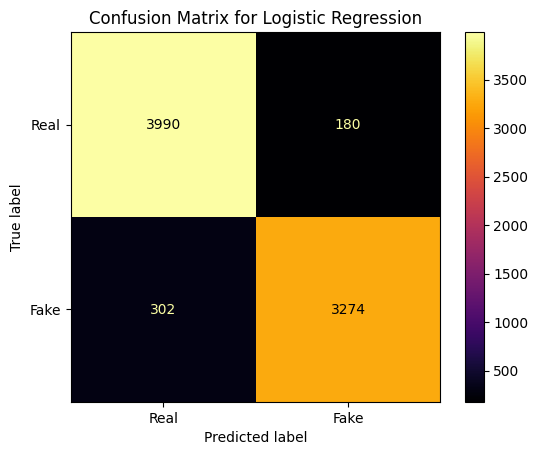

In [41]:
# --- Stone's Section: Confusion Matrix ---

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_log_reg)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap=plt.cm.inferno) #Using inferno Colormap to differential False Positives and False Negatives more distinctly from the ACTUAL Real and Fakes
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

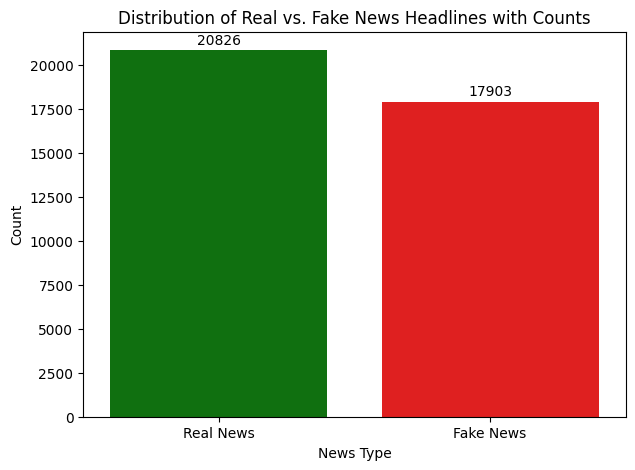

In [42]:
# --- Stone's Section: Real News vs Fake News Distribution Graph ---
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='label', data=df, hue='label', palette={0: 'green', 1: 'red'}, legend=False)

plt.title('Distribution of Real vs. Fake News Headlines with Counts')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real News', 'Fake News'])

# Add total counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

plt.show()

In [43]:
# --- Stone's Section: Finding the Top Words for Fake vs Real News articles ---

#Separate the df into fake/real dfs by label
df_fake = df[df['label'] == 1]
df_real = df[df['label'] == 0]

print("Shape of df_fake:", df_fake.shape)
print("Shape of df_real:", df_real.shape)

print("\nFirst 5 rows of df_fake:")
print(df_fake.head())

print("\nFirst 5 rows of df_real:")
print(df_real.head())

Shape of df_fake: (17903, 2)
Shape of df_real: (20826, 2)

First 5 rows of df_fake:
                                               title  label
0  Ben Stein Calls Out 9th Circuit Court: Committ...      1
3   OOPS: Trump Just Accidentally Confirmed He Le...      1
5   Paul Ryan Responds To Dem’s Sit-In On Gun Con...      1
6  AWESOME! DIAMOND AND SILK Rip Into The Press: ...      1
7  STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...      1

First 5 rows of df_real:
                                               title  label
1  Trump drops Steve Bannon from National Securit...      0
2  Puerto Rico expects U.S. to lift Jones Act shi...      0
4  Donald Trump heads for Scotland to reopen a go...      0
8  North Korea shows no sign it is serious about ...      0
9  Trump signals willingness to raise U.S. minimu...      0


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

#Initialize CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')

#Fit and transform fake news titles
X_fake = vectorizer.fit_transform(df_fake['title'])

#Get words and sum word counts for fake news
word_counts_fake = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X_fake.sum(axis=0).tolist()[0]})
word_counts_fake = word_counts_fake.sort_values(by='count', ascending=False)

#Fit and transform real news titles
X_real = vectorizer.fit_transform(df_real['title'])

#Get words and sum word counts for real news
word_counts_real = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X_real.sum(axis=0).tolist()[0]})
word_counts_real = word_counts_real.sort_values(by='count', ascending=False)

print("Top 10 most frequent words in Fake News titles:")
print(word_counts_fake.head(10))

print("\nTop 10 most frequent words in Real News titles:")
print(word_counts_real.head(10))

Top 10 most frequent words in Fake News titles:
            word  count
13951      trump   7779
14474      video   6396
9335       obama   1741
14691      watch   1560
6601     hillary   1541
7576        just   1252
2765     clinton    825
10401  president    823
4354      donald    748
6069         gop    737

Top 10 most frequent words in Real News titles:
         word  count
12222   trump   5335
10379    says   2899
5822    house   1430
10252  russia    943
7931      new    856
8009    north    852
6645    korea    829
12968   white    804
10562  senate    752
2198    china    729


/tmp/ipython-input-1148857799.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_fake_words, palette='Reds_d')
/tmp/ipython-input-1148857799.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_real_words, palette='Greens_d')


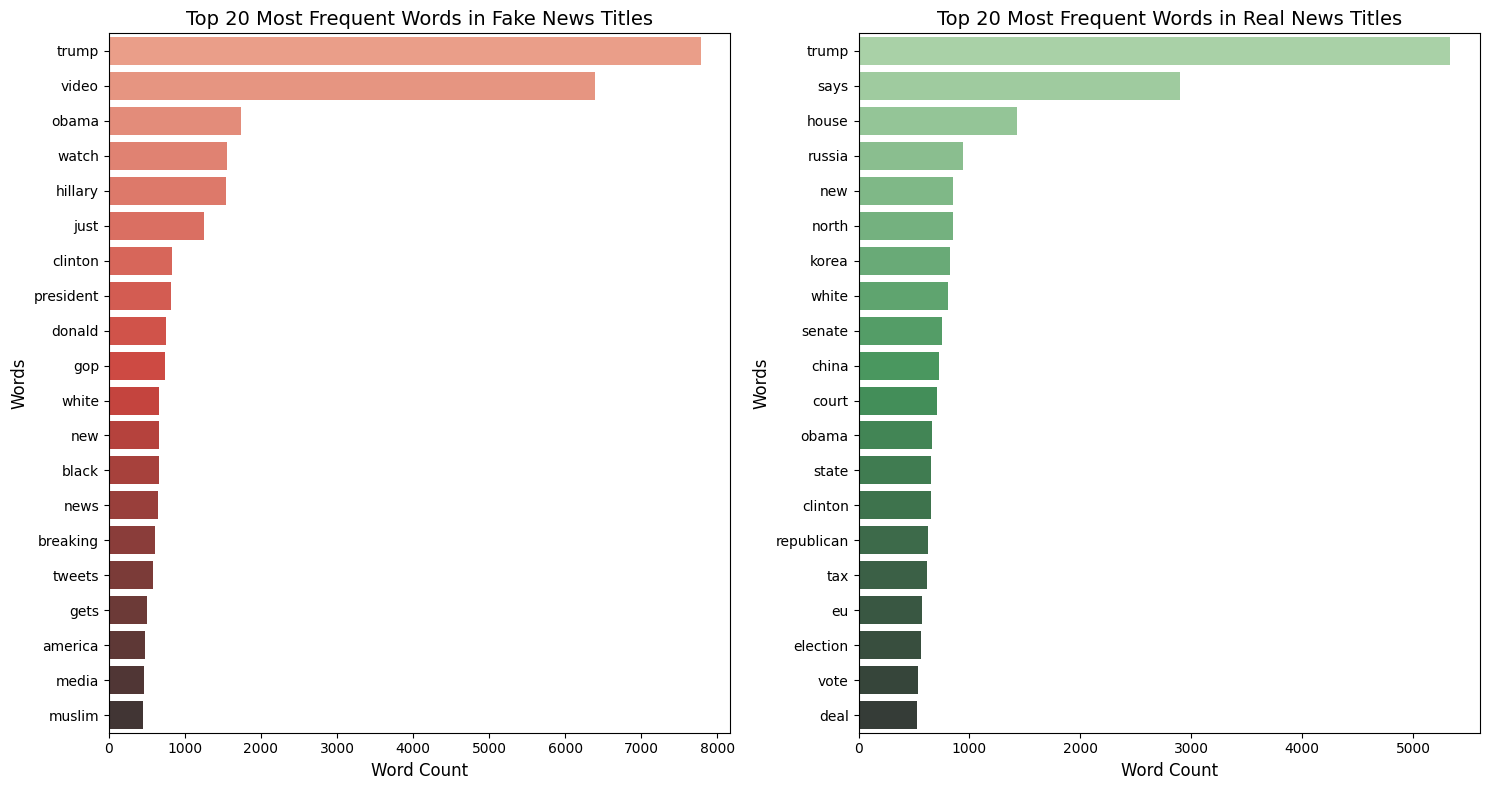

In [45]:

#Number of top words to display
num_top_words = 20

# Prepare data for plotting
top_fake_words = word_counts_fake.head(num_top_words)
top_real_words = word_counts_real.head(num_top_words)

# Create a figure with two subplots for comparison
plt.figure(figsize=(15, 8))

# Subplot for Fake News
plt.subplot(1, 2, 1)
sns.barplot(x='count', y='word', data=top_fake_words, palette='Reds_d')
plt.title(f'Top {num_top_words} Most Frequent Words in Fake News Titles', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Subplot for Real News
plt.subplot(1, 2, 2)
sns.barplot(x='count', y='word', data=top_real_words, palette='Greens_d')
plt.title(f'Top {num_top_words} Most Frequent Words in Real News Titles', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

In [46]:
!pip install -q lime shap

In [47]:
# Rebuild vectorized train/test with the CURRENT vectorizer
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vectorized, y_train)

print("Model expects:", log_reg.n_features_in_)
print("Vectorizer output dims:", len(vectorizer.get_feature_names_out()))

Model expects: 18946
Vectorizer output dims: 18946



=================== SHAP SUMMARY PLOT LEGEND ===================

   Blue Line = Low feature value
   - The word appears rarely or weakly across most headlines (low TF-IDF).

   Red Dot = High feature value
   - The word appears strongly in that specific headline (high TF-IDF).

  Positive SHAP Value (Right side)
   - The word pushes the model toward predicting Fake News (Class 1).

  Negative SHAP Value (Left side)
   - The word pushes the model toward predicting Real News (Class 0).

  Word Order (Top -> Bottom)
   - Words at the top have the greatest impact on the model's decisions.
   - Words lower on the chart influence the model less.


Creating SHAP LinearExplainer for Logistic Regression...
Computing SHAP values...
Generating SHAP summary plot (global feature importance)...


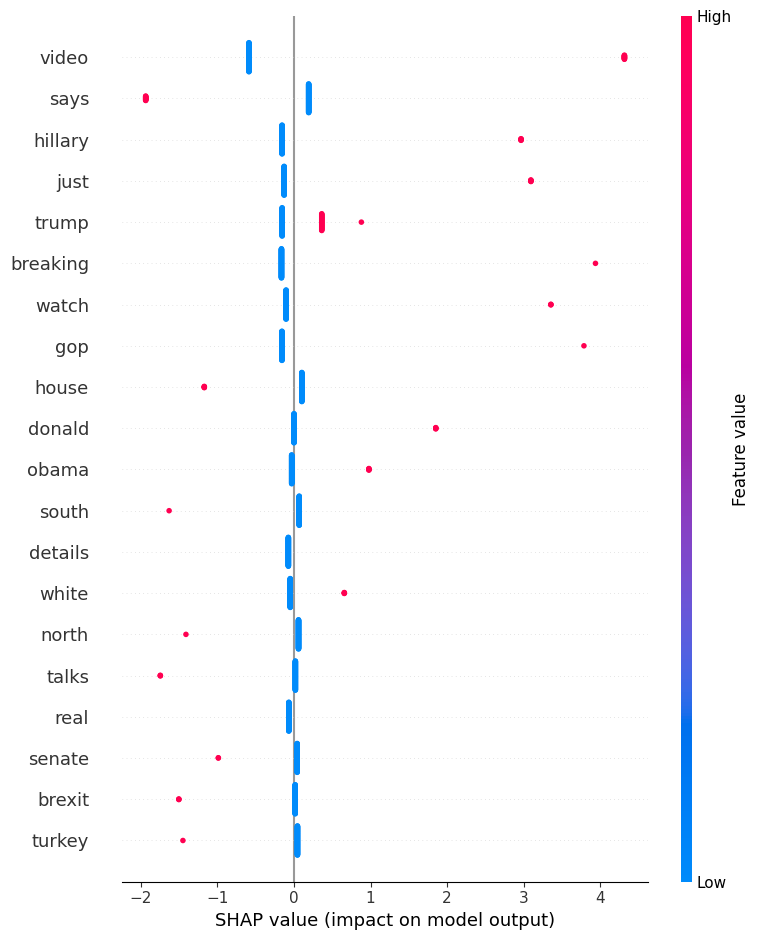


 SHAP summary plot generated.

Creating SHAP plot for one sample (index 11 in sample)...


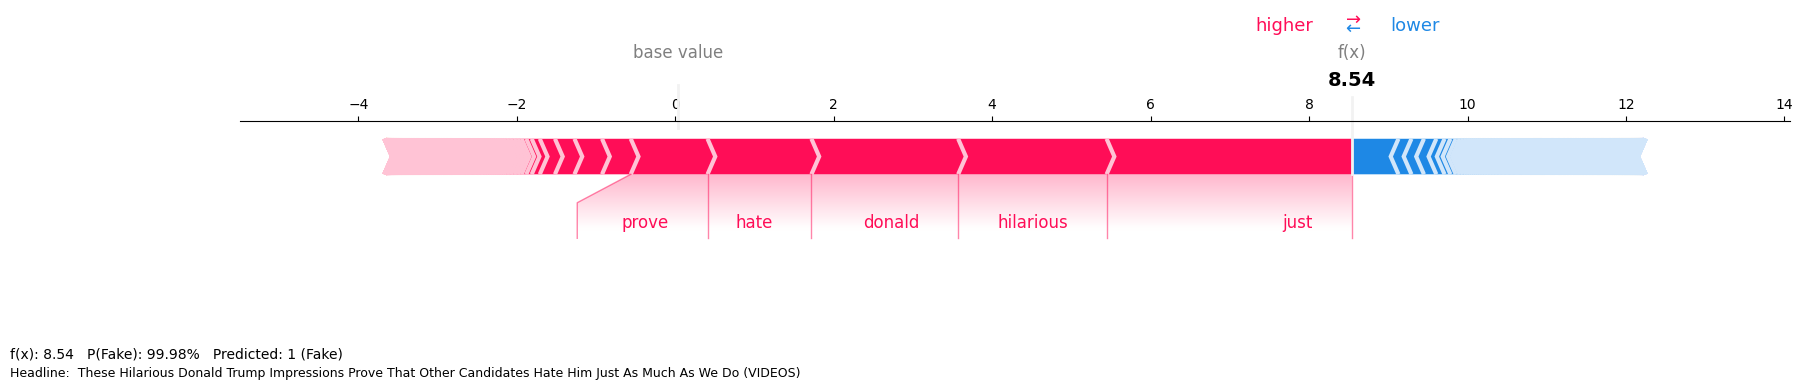


SHAP local plot generated with headline + prediction info.


In [56]:
# 8.2 MODEL EXPLAINABILITY WITH SHAP (GLOBAL + LOCAL VIEW)
import shap
import math
import matplotlib.pyplot as plt

shap.initjs()

# Use a subset of training data as background for efficiency (200 samples)
background_size = min(200, X_train_vectorized.shape[0])
background_idx = np.random.choice(X_train_vectorized.shape[0],
                                  size=background_size,
                                  replace=False)
background_data = X_train_vectorized[background_idx]
# SHAP Legend / Key Below the Summary Plot
print("""
=================== SHAP SUMMARY PLOT LEGEND ===================

   Blue Line = Low feature value
   - The word appears rarely or weakly across most headlines (low TF-IDF).

   Red Dot = High feature value
   - The word appears strongly in that specific headline (high TF-IDF).

  Positive SHAP Value (Right side)
   - The word pushes the model toward predicting Fake News (Class 1).

  Negative SHAP Value (Left side)
   - The word pushes the model toward predicting Real News (Class 0).

  Word Order (Top -> Bottom)
   - Words at the top have the greatest impact on the model's decisions.
   - Words lower on the chart influence the model less.

===============================================================
""")
print("Creating SHAP LinearExplainer for Logistic Regression...")
explainer_shap = shap.LinearExplainer(log_reg, background_data)

# Sample from test set for analysis
test_sample_size = min(100, X_test_vectorized.shape[0])
test_sample_idx = np.random.choice(X_test_vectorized.shape[0],
                                   size=test_sample_size,
                                   replace=False)
X_test_sample = X_test_vectorized[test_sample_idx]

print("Computing SHAP values...")
shap_values = explainer_shap(X_test_sample)

feature_names = vectorizer.get_feature_names_out()

# Handle SHAP APIs
if hasattr(shap_values, "values"):
    values = shap_values.values
else:
    # For binary classification list format: choose positive class (index 1)
    values = shap_values[1]

X_test_sample_dense = X_test_sample.toarray()

print("Generating SHAP summary plot (global feature importance)...")
shap.summary_plot(
    values,
    X_test_sample_dense,
    feature_names=feature_names,
    show=True
)

print("\n SHAP summary plot generated.")

# detailed local explanation for one sample
single_index = 11   # index inside the test_sample we chose

if hasattr(explainer_shap, "expected_value"):
    ev = explainer_shap.expected_value
else:
    ev = np.mean(values, axis=0)

# If expected_value is an array (per class), pick index 1 for positive class
if isinstance(ev, (list, np.ndarray)) and np.array(ev).ndim > 0 and len(np.atleast_1d(ev)) > 1:
    ev_plot = np.atleast_1d(ev)[1]
    sv_plot = values[single_index, :]
else:
    ev_plot = ev
    sv_plot = values[single_index, :]

print(f"\nCreating SHAP plot for one sample (index {single_index} in sample)...")

# Map from sample index -> original X_test index, then get the raw headline text
raw_index = test_sample_idx[single_index]
headline_text = X_test.iloc[raw_index]

# Create the SHAP force plot but don't allow to show yet
viz = shap.force_plot(
    ev_plot,
    sv_plot,
    feature_names=feature_names,
    matplotlib=True,
    show=False      # will show after adding text
)

# Compute prediction info from SHAP values
fx = float(ev_plot + sv_plot.sum())           # log-odds
prob_class1 = 1 / (1 + math.exp(-fx))         # sigmoid → P(class 1)
pred_class = 1 if prob_class1 >= 0.5 else 0   # predicted class
class_meaning = {0: "Real", 1: "Fake"}

# Get the current SHAP figure
fig = plt.gcf()

# Add headline near bottom of the figure
fig.text(
    0.01, 0.02,
    f"Headline: {headline_text}",
    fontsize=9,
    ha="left",
    va="bottom",
    wrap=True
)

# Add prediction info above
fig.text(
    0.01, 0.08,
    f"f(x): {fx:.2f}   P(Fake): {prob_class1*100:.2f}%   "
    f"Predicted: {pred_class} ({class_meaning[pred_class]})",
    fontsize=10,
    ha="left",
    va="bottom"
)

plt.show()

print("\nSHAP local plot generated with headline + prediction info.")
